<a href="https://www.kaggle.com/code/aisuko/text-to-image-with-sd2-1?scriptVersionId=164233930" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Overview

Stable Diffusion is a text-to-image latene diffusion model created by the researchers and engineers from CompVis, Stability AI and LAION. It is trained on **512x512** images from a subset of the LAION-5B database. This model uses a frozen CLIP ViT-L/14 text encoder to condition the model on text prompts. With its 860M Unet and 123M text encoder, the model is realatively lightweight and can run on many consumer GPUs. And the LAION-5B is the largest, freely accessible multi-model dataset that currently exists. In this notebook, we are going to use Stable Diffusion 2.1 to generate images.

In [1]:
%%capture
!pip install diffusers==0.26.3
# ImportError: cannot import name 'CpuOffload' from 'accelerate.hooks'
!pip install transformers==4.38.1
!pip install accelerate==0.27.2
!pip install compel==2.0.2

In [2]:
import os
import torch
import warnings

os.environ['MODEL_NAME']='stabilityai/stable-diffusion-2-1'

if torch.cuda.is_available():
    torch_device = 'cuda'
else:
    torch_device = 'cpu'

warnings.filterwarnings('ignore')
    
print(torch_device)

cuda


# Loading the model

`StableDiffusionPipeline` is an end-to-end inference pipeline that you can yse to generate images from text with just a few lines of code.

In [3]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

pipe = StableDiffusionPipeline.from_pretrained(os.getenv('MODEL_NAME'), torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to(torch_device)
print(pipe)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.26.3",
  "_name_or_path": "stabilityai/stable-diffusion-2-1",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DPMSolverMultistepScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}



In [4]:
from compel import Compel

prompt ='A breathtaking panorama of Melbourne Beach at dusk. The golden sun dips below the horizon, casting a warm glow on the endless stretch of pristine white sand. Gentle waves lap at the shore, their rhythmic sound mingling with the cries of seagulls soaring overhead. Palm trees sway gently in the breeze, casting long shadows on the beach. In the distance, the iconic Melbourne Beach Pier stretches out into the ocean, silhouetted against the vibrant hues of the setting sun. The air is filled with the salty scent of the ocean and the feeling of peace and tranquility.'
negative_prompt='Blurry or pixelated image'

compel=Compel(tokenizer=pipe.tokenizer, text_encoder=pipe.text_encoder, truncate_long_prompts=False)
conditioning=compel.build_conditioning_tensor(prompt)
negative_conditioning=compel.build_conditioning_tensor(negative_prompt)

[con_embeds, neg_embeds] = compel.pad_conditioning_tensors_to_same_length([conditioning, negative_conditioning])

print(con_embeds.size())
print(neg_embeds.size())

Token indices sequence length is longer than the specified maximum sequence length for this model (113 > 77). Running this sequence through the model will result in indexing errors


torch.Size([1, 154, 1024])
torch.Size([1, 154, 1024])


In [5]:
image = pipe(prompt=prompt, negative_prompt=negative_prompt).images[0]
image

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['out into the ocean, silhouetted against the vibrant hues of the setting sun. the air is filled with the salty scent of the ocean and the feeling of peace and tranquility.']


  0%|          | 0/50 [00:00<?, ?it/s]

# About Seed

Please check more about Seed in the article[The Parameters for Stunning AI Images](https://aisuko.gitbook.io/wiki/ai-techniques/stable-diffusion/the-important-parameters-for-stunning-ai-image#seed)

Running the below cell multiple times will give you a different image every time. If you want deterministic output you can pass a random seed to the pipeline. Every time you use the same you will have the same image result.

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['out into the ocean, silhouetted against the vibrant hues of the setting sun. the air is filled with the salty scent of the ocean and the feeling of peace and tranquility.']


  0%|          | 0/50 [00:00<?, ?it/s]

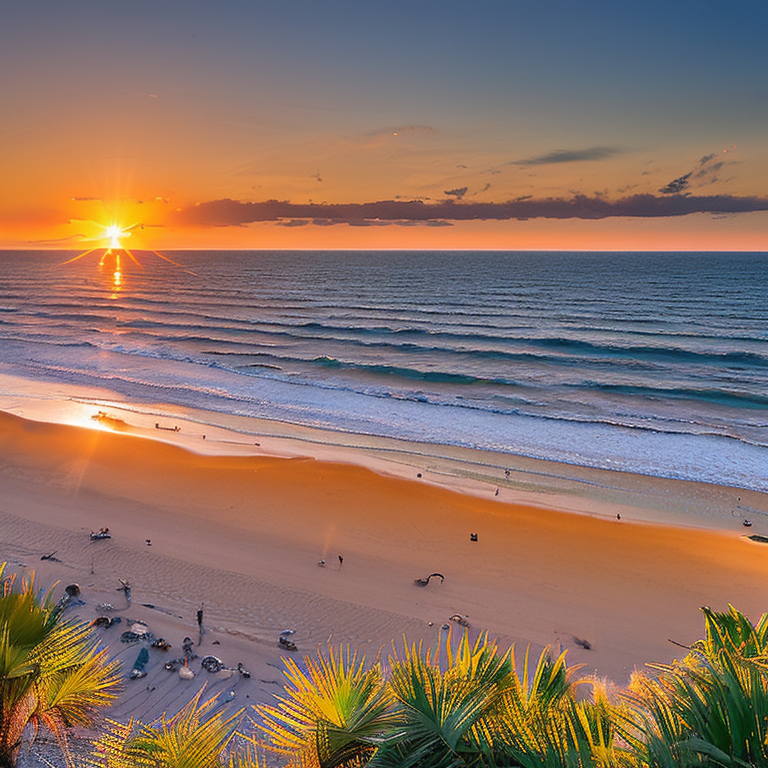

In [6]:
generator = torch.Generator(torch_device).manual_seed(5775709)
image = pipe(prompt=prompt,negative_prompt=negative_prompt, generator=generator).images[0]
image

# Number of Inference Steps

We can change the number of inference steps using the `num_inference_steps` argument. In general, results are better the more steps you use. Normally yhe default value is 50. If you want faster results you can use a smaller number.

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['out into the ocean, silhouetted against the vibrant hues of the setting sun. the air is filled with the salty scent of the ocean and the feeling of peace and tranquility.']


  0%|          | 0/30 [00:00<?, ?it/s]

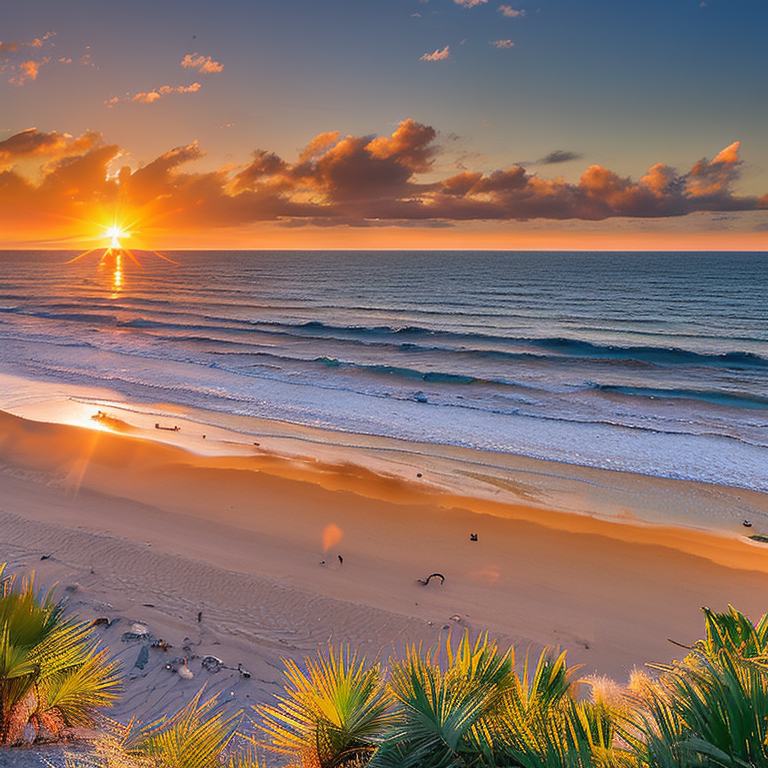

In [7]:
generator = torch.Generator(torch_device).manual_seed(5775709)
image = pipe(prompt=prompt, negative_prompt=negative_prompt, num_inference_steps=30, generator=generator).images[0]
image

# Generating Multiple Images

It is a way to increase the adherence to the conditional signal which in this case is text as well as overall sample quality. In simple terms classifer free guidance dorces the generation to better match with the prompt. Numbers like 7 or 8.5 give good results, if you use a very large number the images might look good, but will be less diverse.

In [8]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [9]:
num_images =3
prompt = ["A breathtaking panorama of Melbourne Beach at dusk. The golden sun dips below the horizon, casting a warm glow on the endless stretch of pristine white sand. Gentle waves lap at the shore, their rhythmic sound mingling with the cries of seagulls soaring overhead. Palm trees sway gently in the breeze, casting long shadows on the beach. In the distance, the iconic Melbourne Beach Pier stretches out into the ocean, silhouetted against the vibrant hues of the setting sun. The air is filled with the salty scent of the ocean and the feeling of peace and tranquility."] * num_images

images = pipe(prompt).images

grid = image_grid(images, rows=1, cols=3)
grid

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['out into the ocean, silhouetted against the vibrant hues of the setting sun. the air is filled with the salty scent of the ocean and the feeling of peace and tranquility.', 'out into the ocean, silhouetted against the vibrant hues of the setting sun. the air is filled with the salty scent of the ocean and the feeling of peace and tranquility.', 'out into the ocean, silhouetted against the vibrant hues of the setting sun. the air is filled with the salty scent of the ocean and the feeling of peace and tranquility.']


  0%|          | 0/50 [00:00<?, ?it/s]

# Generate non_square images

Let's create a rectangular images in portrait or landscape ratios, there are some recommendations to chooise good image sizes:
* Make sure `heigh` and `width` are both multiples of 8
* Going below 512 might result in lower quality images
* Going over 512 in both directions will repeat image areas (global coherence is lost)
* The best way to create non-squre images is to use `512` in one dimension, and a value larger than that in the other one

In [10]:
image = pipe(prompt=prompt, num_inference_steps=30, generator=generator, height=512, width=768).images[0]
image

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['out into the ocean, silhouetted against the vibrant hues of the setting sun. the air is filled with the salty scent of the ocean and the feeling of peace and tranquility.', 'out into the ocean, silhouetted against the vibrant hues of the setting sun. the air is filled with the salty scent of the ocean and the feeling of peace and tranquility.', 'out into the ocean, silhouetted against the vibrant hues of the setting sun. the air is filled with the salty scent of the ocean and the feeling of peace and tranquility.']


  0%|          | 0/30 [00:00<?, ?it/s]

# Diffusion Process in Inference

Putting it together, let's now takes a closer look at how the model works in inference by illustrating the logical flow

![](https://hostux.social/system/media_attachments/files/110/683/631/285/614/442/original/6a9f7fecd5e3949b.png)

The stable diffusion model takes both a latent seed and a text prompt as an input. The latent seed is then used to generate random latent image representations of size 64x64 where as the text prompt is tranformed to text embeddings of size 77x768 via CLIP's text encoder.

DPM Solve Multistep scheduler is able to achieve great quality in less steps, like 25.
